In [86]:
# download dataset that label from roboflow

!gdown 1ZYkqUnv1K_d8pEFH0JNZSS9P89n3y0nD
!unzip test.v1i.yolov8.zip

Downloading...
From: https://drive.google.com/uc?id=1ZYkqUnv1K_d8pEFH0JNZSS9P89n3y0nD
To: /content/test.v1i.yolov8.zip
100% 7.80M/7.80M [00:00<00:00, 161MB/s]
Archive:  test.v1i.yolov8.zip
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data.yaml               
  inflating: __MACOSX/._data.yaml    
  inflating: README.roboflow.txt     
  inflating: __MACOSX/._README.roboflow.txt  
  inflating: __MACOSX/._train        
  inflating: __MACOSX/train/._images  
  inflating: __MACOSX/train/._labels  
  inflating: train/images/Data_Bottles_png.rf.b15246a9218706ebbf35d5ff34041a9a.jpg  
  inflating: __MACOSX/train/images/._Data_Bottles_png.rf.b15246a9218706ebbf35d5ff34041a9a.jpg  
  inflating: train/images/Data_Bottles_png.rf.53aec19fd241c9a1a17f6e17437593f2.jpg  
  inflating: __MACOSX/train/images/._Data_Bottles_png.rf.53aec19fd241c9a1a17f6e17437593f2.jpg  
  inflating: train/images/Data_Bottles_png.rf.9dc82f96a1d6fbd624a301ae9dd0b10c.jpg  
  inflating: __MACOSX/train/i

In [34]:
# install libs

!pip install ultralytics sahi
from ultralytics import YOLO
import os
import random
import shutil
import yaml
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# split data to create validation set

train_path = '/content/train'
valid_path = '/content/valid'

os.makedirs(os.path.join(valid_path, 'images'), exist_ok=True)
os.makedirs(os.path.join(valid_path, 'labels'), exist_ok=True)

images = [f for f in os.listdir(os.path.join(train_path, 'images')) if f.endswith(('.jpg', '.jpeg', '.png'))]

num_valid = int(len(images) * 0.2)
valid_images = random.sample(images, num_valid)

for img_name in valid_images:
    shutil.move(os.path.join(train_path, 'images', img_name),
                os.path.join(valid_path, 'images', img_name))

    label_name = os.path.splitext(img_name)[0] + '.txt'
    if os.path.exists(os.path.join(train_path, 'labels', label_name)):
        shutil.move(os.path.join(train_path, 'labels', label_name),
                    os.path.join(valid_path, 'labels', label_name))

print(f"total image in valid: {num_valid}")

In [ ]:
# create new yaml
data_yaml = {
    'train': '/content/train/images',
    'val': '/content/valid/images',
    'nc': 1,
    'names': ['bottle']
}

# dump yaml
with open('/content/data.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print("create new data.yaml successfully")

In [70]:
# 1. Load pre-trained model
model = YOLO('yolov8s.pt')

# 2. Train Model
results = model.train(
    data='/content/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    patience=50,
    device=0,
    name='v8sd'
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=v8sd, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=50, perspective=0.0, plots=Tru

In [5]:
results = model.val()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 43.6±24.0 MB/s, size: 108.8 KB)
val: Scanning /content/valid/labels... 44 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 44/44 292.8it/s 0.2s
val: /content/valid/images/Data_Bottles_png.rf.3aecb5a0e2bc119d4f1634824cd3d376.jpg: 1 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.4528f373f29d7957b3605586f3741ec8.jpg: 1 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.52f4e0f9135096b8446ad6a384ddf305.jpg: 2 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.5d732710bfc77ad63dbc2ddbfc22a146.jpg: 1 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.770a9356d27dc3e4582a641d6cafbae7.jpg: 1 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.86bcc39ef86db6d46a452cc220637f3f.jpg: 1 duplicate labels removed
val: /content/valid/images/Data_Bottles_png.rf.8

In [ ]:
# 1. Load model
model = YOLO('/content/runs/detect/v8normal2/weights/best.pt')
img_path = cv2.imread('/content/Example_Test_Bottles.png')

# 2. Predict
img_path = model.predict(
    img_path,
    imgsz=1280,
    conf=0.6,
    iou=0,
)

# 3. coutn
bottle_count = len(results[0].boxes)
print(f"Total bottles: {bottle_count}")

# show image
from google.colab.patches import cv2_imshow
cv2_imshow(results[0].plot(labels=False))


0: 736x1280 62 bottles, 31.5ms
Speed: 6.9ms preprocess, 31.5ms inference, 0.5ms postprocess per image at shape (1, 3, 736, 1280)
Total blue bottles: 62


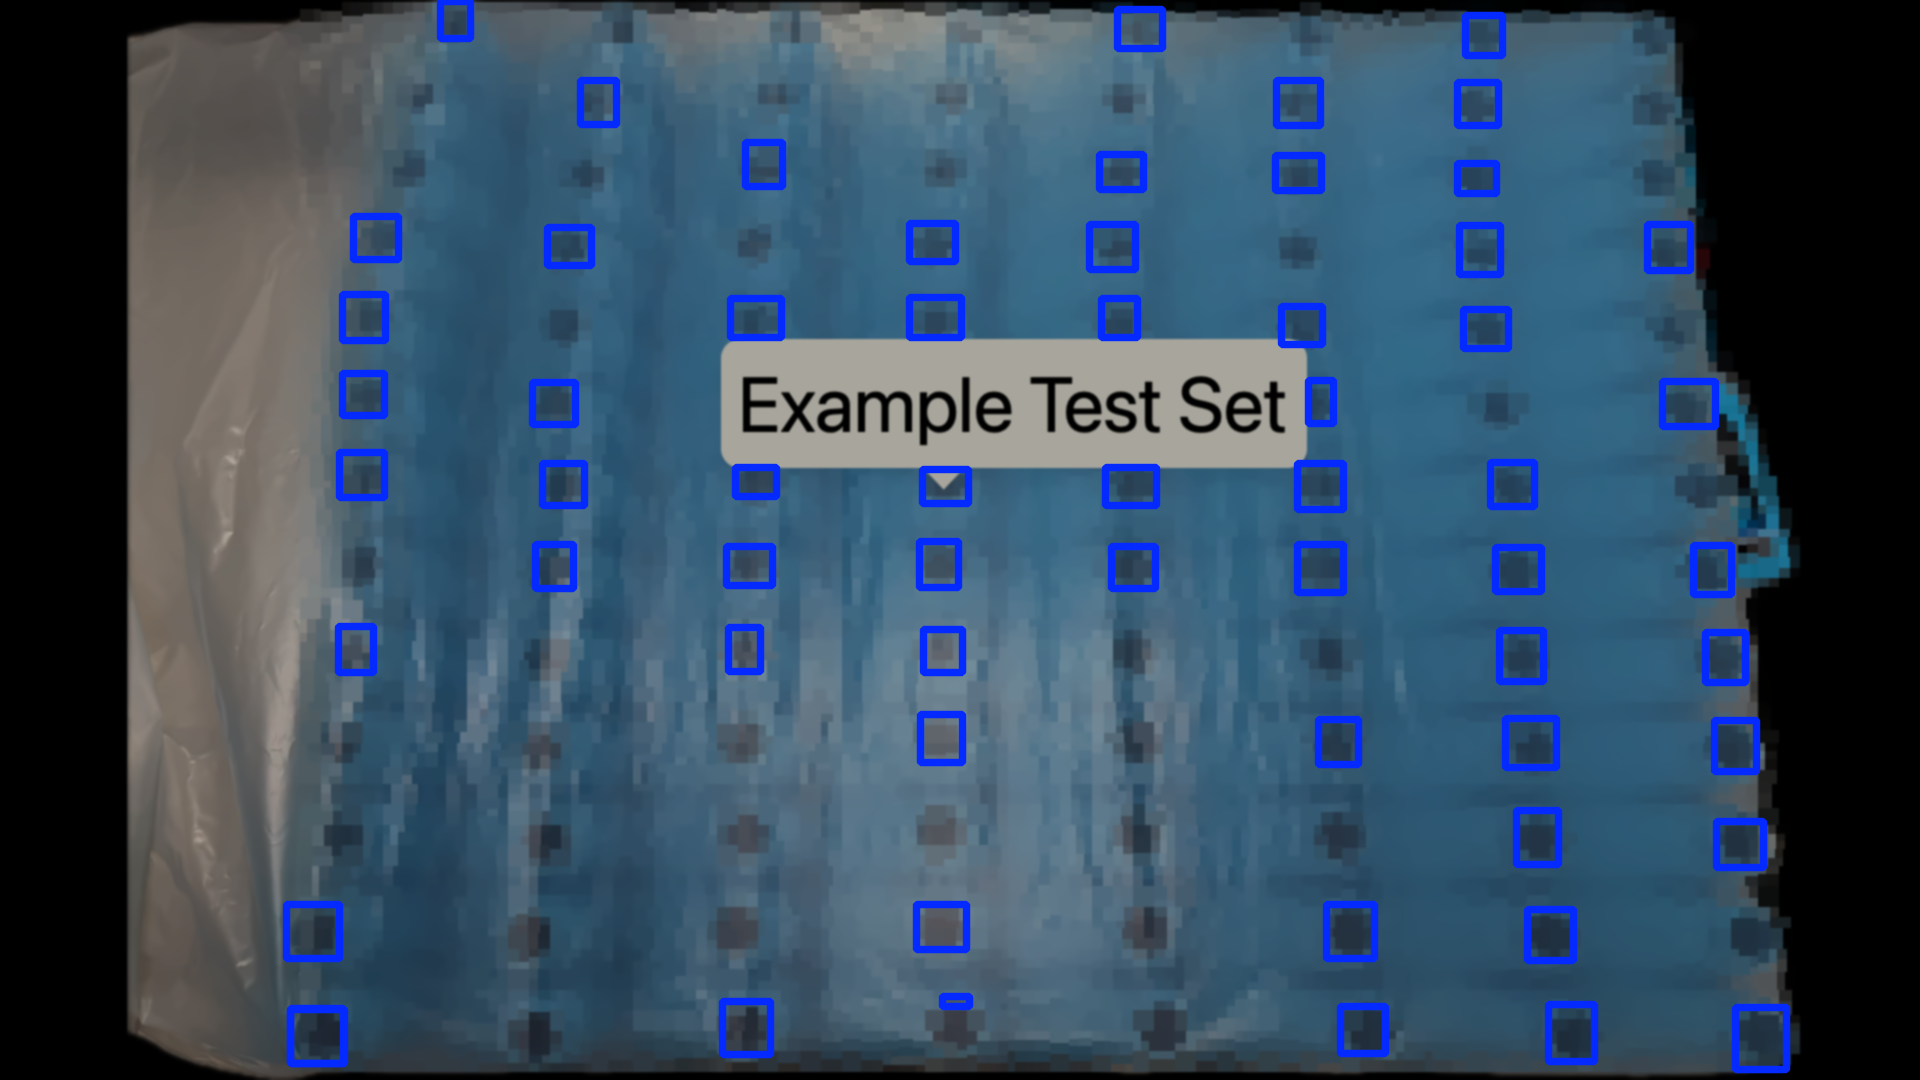

In [28]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Load trained model
model = YOLO('/content/best11s.pt')
img_path = cv2.imread('/content/Example_Test_Bottles.png')

denoised_image = cv2.fastNlMeansDenoising(img_path)
auto_contrast = cv2.normalize(denoised_image, None, 0, 175, cv2.NORM_MINMAX)
smoothed_image = cv2.GaussianBlur(auto_contrast, (5, 5), 0)

# 2. Predict
results = model.predict(
    smoothed_image,
    imgsz=1280,
    conf=0.25,
    iou=0,
    save=False
)

# 3. Count bottles
bottle_count = len(results[0].boxes)
print(f"Total blue bottles: {bottle_count}")

# 4. Show result
result_img = results[0].plot(labels=False)
cv2_imshow(result_img)

In [ ]:
# try to use SAHI but not work with this case

# import cv2
# from sahi import AutoDetectionModel
# from sahi.predict import get_sliced_prediction
# from google.colab.patches import cv2_imshow

# # 1. Load model
# model_path = '/content/best11s.pt'

# detection_model = AutoDetectionModel.from_pretrained(
#     model_type='ultralytics',
#     model_path=model_path,
#     confidence_threshold=0.1,
#     image_size=1280,
#     device="cuda:0"
# )

# # 2. SAHI Sliced Prediction
# result = get_sliced_prediction(
#     smoothed_image,  #
#     detection_model=detection_model,
#     slice_height=512,
#     slice_width=512,
#     overlap_height_ratio=1,
#     overlap_width_ratio=1,
# )

# # 3. Count bottles
# bottle_count = len(result.object_prediction_list)
# print(f"🔥 จำนวนขวดที่นับได้ (SAHI tuned): {bottle_count} ขวด")

# # 4. Draw Bounding Boxes
# original_img = cv2.imread('/content/Example_Test_Bottles.png')

# for obj in result.object_prediction_list:
#     x1, y1, x2, y2 = map(int, obj.bbox.to_voc_bbox())
#     cv2.rectangle(original_img, (x1, y1), (x2, y2), (0,255,0), 2)

# cv2_imshow(cv2.resize(original_img, (1024, 768)))